In [1]:
import data_functions, pytorch_classes
import torch
from torchvision.transforms import transforms
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
import os
torch.set_num_threads(os.cpu_count())

# Training ConvNet

In [4]:
# creating lists of paths to photos and encodings
input_list, enc_list = data_functions.list_of_paths('data/train/train.csv')
# creating paris of phots and encodings
# 1 - it is encoding of this photo, 0 - it is NOT encoding of this photo
pairs, labels = data_functions.create_list_of_pairs_and_labels(input_list, enc_list, 1)

#traintest split
pairs_train, pairs_test, labels_train, labels_test = train_test_split(pairs, labels, test_size=0.15)

train_dataset = pytorch_classes.ImageDataset(pairs=pairs_train, labels=labels_train, transform=transforms.ToTensor())
test_dataset = pytorch_classes.ImageDataset(pairs=pairs_test, labels=labels_test, transform=transforms.ToTensor())

100%|██████████| 20/20 [05:05<00:00, 15.26s/it]


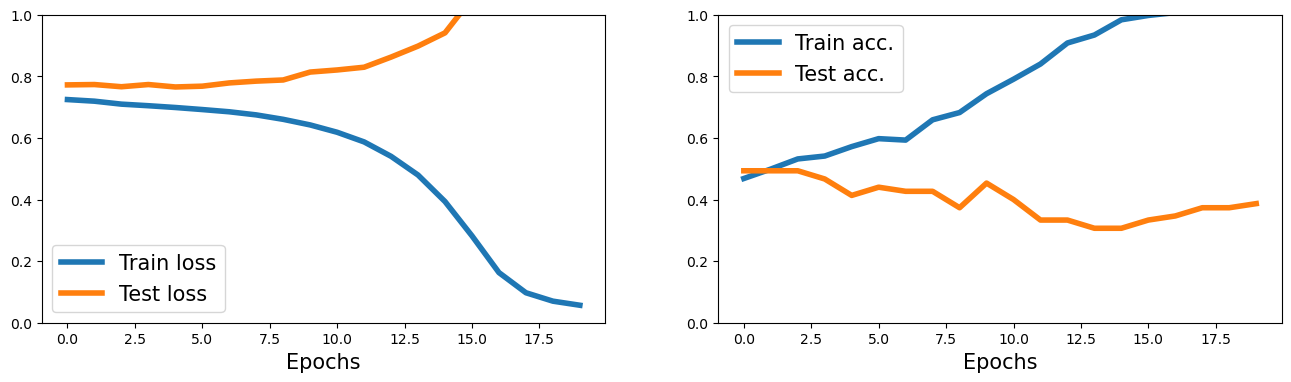

In [5]:
model = pytorch_classes.training(20, learning_rate=0.01, train_dataset=train_dataset, test_dataset=test_dataset)

# Generating Predictions

In [4]:
# creating lists of paths to photos and encodings
input_list_test, enc_list_test = data_functions.list_of_paths('data/test/test.csv')
# creating paris of phots and encodings (0 - photos in pairs is not the same, 1- photo and encoding are the same picture)
pairs_test, labels_test = data_functions.create_list_of_pairs_and_labels(input_list_test, enc_list_test, 0)

test_dataset = pytorch_classes.ImageDataset(pairs=pairs_test, labels=labels_test, transform=transforms.ToTensor())
test_DL = torch.utils.data.DataLoader(test_dataset, batch_size=8)

In [ ]:
preds = []
for imgs, encs, _ in tqdm(test_DL):
    with torch.no_grad():
        pred = (model(imgs, encs)[:,0] >= 0.5).int()
    preds.append(pred.numpy())
preds = np.concatenate(preds)

 51%|█████▏    | 643/1250 [01:52<01:30,  6.71it/s]

In [ ]:
#np.savetxt('test_predictions.csv', preds, fmt='%i')